In [2]:
import gc
import json
import numpy as np
import pandas as pd

# Preparing Data

In [226]:
data = []
with open('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json') as f:
    for line in f:
        data.append(json.loads(line))

In [17]:
for d in data:
    #for key, val in d['votes'].items():    # add each value in 'votes' as a column
     #   d[key] = val
    del d['votes']

In [19]:
reviews = []
for d in range(len(data)):
    gc.disable()
    reviews.append(pd.DataFrame(data[d], index=[0]))
    gc.enable()

In [ ]:
df = pd.concat(reviews, axis = 0)           # Concatenate list of small dataframes into one big dataframe
df.to_csv('yelp_reviews.csv')

In [16]:
pd.to_pickle(df, 'reviewsDF.pkl')
df.head()

,business_id,date,review_id,stars,text,type,user_id
0,vcNAWiLM4dR7D2nwwJ7nCA,2007-05-17,15SdjuK7DmYqUAj6rjGowg,5,dr. goldberg offers everything i look for in a...,review,Xqd0DzHaiyRqVH3WRG7hzg
0,vcNAWiLM4dR7D2nwwJ7nCA,2010-03-22,RF6UnRTtG7tWMcrO2GEoAg,2,"Unfortunately, the frustration of being Dr. Go...",review,H1kH6QZV7Le4zqTRNxoZow
0,vcNAWiLM4dR7D2nwwJ7nCA,2012-02-14,-TsVN230RCkLYKBeLsuz7A,4,Dr. Goldberg has been my doctor for years and ...,review,zvJCcrpm2yOZrxKffwGQLA
0,vcNAWiLM4dR7D2nwwJ7nCA,2012-03-02,dNocEAyUucjT371NNND41Q,4,Been going to Dr. Goldberg for over 10 years. ...,review,KBLW4wJA_fwoWmMhiHRVOA
0,vcNAWiLM4dR7D2nwwJ7nCA,2012-05-15,ebcN2aqmNUuYNoyvQErgnA,4,Got a letter in the mail last week that said D...,review,zvJCcrpm2yOZrxKffwGQLA


In [12]:
pd.unique(df.type)                          # Get all the unique values from the column 'type'

array(['review'], dtype=object)

In [17]:
df = df.drop(df.columns[[1, 2, 5, 6]], axis=1)   # Remove unnecessary columns
pd.to_pickle(df, 'reviewsDFRed.pkl')

In [20]:
df.head()

,business_id,stars,text
0,vcNAWiLM4dR7D2nwwJ7nCA,5,dr. goldberg offers everything i look for in a...
0,vcNAWiLM4dR7D2nwwJ7nCA,2,"Unfortunately, the frustration of being Dr. Go..."
0,vcNAWiLM4dR7D2nwwJ7nCA,4,Dr. Goldberg has been my doctor for years and ...
0,vcNAWiLM4dR7D2nwwJ7nCA,4,Been going to Dr. Goldberg for over 10 years. ...
0,vcNAWiLM4dR7D2nwwJ7nCA,4,Got a letter in the mail last week that said D...


In [9]:
data = []
with open('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json') as f:
    for line in f:
        data.append(json.loads(line))

In [31]:
for d in data:
    del d['attributes']
    del d['full_address']
    del d['hours']
    del d['latitude']
    del d['longitude']
    del d['neighborhoods']
    del d['open']
    del d['stars']

In [40]:
businesses = [d for d in data]
businesses = pd.DataFrame(businesses)
businesses.head()

,business_id,categories,city,name,review_count,state,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"Eric Goldberg, MD",9,AZ,business
1,UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,Clancy's Pub,4,PA,business
2,cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,Cool Springs Golf Center,5,PA,business
3,HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,Verizon Wireless,3,PA,business
4,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,Emil's Lounge,11,PA,business


In [52]:
print ('Number of unique business_ids from the reviews dataset:', len(set(df['business_id'])))
print ('Number of unique business_ids from the business dataset:', len(businesses))
print ('Number of business_ids the two datasets have in common:', len(set(df['business_id']) & set(businesses['business_id'])))

Number of unique business_ids from the reviews dataset: 60785
Number of unique business_ids from the business dataset: 61184
Number of business_ids the two datasets have in common: 60785


In [65]:
category_len = [len(c) for c in businesses['categories']]  # Checks if the categories field is empty or not
for cat in businesses['categories'][np.array(category_len) == 0]:
    cat.append('NA')

In [63]:
businesses

,business_id,categories,city,name,review_count,state,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"Eric Goldberg, MD",9,AZ,business
1,UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,Clancy's Pub,4,PA,business
2,cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,Cool Springs Golf Center,5,PA,business
3,HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,Verizon Wireless,3,PA,business
4,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,Emil's Lounge,11,PA,business
5,KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,Alexion's Bar & Grill,15,PA,business
6,b12U9TFESStdy7CsTtcOeg,"[Auto Repair, Automotive]",Carnegie,Flynn's E W Tire Service Center,5,PA,business
7,Sktj1eHQFuVa-M4bgnEh8g,"[Active Life, Mini Golf]",Carnegie,Forsythe Miniature Golf & Snacks,4,PA,business
8,3ZVKmuK2l7uXPE6lXY4Dbg,"[Home Services, Contractors]",Carnegie,Quaker State Construction,3,PA,business
9,wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,Kings Family Restaurant,8,PA,business


In [68]:
pd.unique(businesses.state)

array(['AZ', 'PA', 'NC', 'SC', 'WI', 'IL', 'NV', 'WA', 'CA', 'QC', 'ON',
       'EDH', 'MLN', 'ELN', 'HAM', 'SCB', 'FIF', 'XGL', 'NTH', 'BW', 'RP',
       'KHL', 'MN', 'MA', 'NW', 'OR'], dtype=object)

In [73]:
# Select those businesses that are in US
businesses = businesses[businesses['state'].isin(['AZ', 'PA', 'NC', 'SC', 'WI', 'IL', 'NV', 'WA', 'CA', 'MN', 'MA', 'OR'])]
businesses = businesses.drop(businesses.columns[[2, 3, 6]], axis=1)

In [75]:
businesses.head()

,business_id,categories,review_count,state
0,vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",9,AZ
1,UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],4,PA
2,cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",5,PA
3,HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",3,PA
4,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",11,PA


In [76]:
sum(businesses['categories'], [])     # Get the list of all categories

['Doctors',
 'Health & Medical',
 'Nightlife',
 'Active Life',
 'Mini Golf',
 'Golf',
 'Shopping',
 'Home Services',
 'Internet Service Providers',
 'Mobile Phones',
 'Professional Services',
 'Electronics',
 'Bars',
 'American (New)',
 'Nightlife',
 'Lounges',
 'Restaurants',
 'Bars',
 'American (Traditional)',
 'Nightlife',
 'Restaurants',
 'Auto Repair',
 'Automotive',
 'Active Life',
 'Mini Golf',
 'Home Services',
 'Contractors',
 'Burgers',
 'Breakfast & Brunch',
 'American (Traditional)',
 'Restaurants',
 'Food',
 'Grocery',
 'Bars',
 'American (Traditional)',
 'Nightlife',
 'Lounges',
 'Restaurants',
 'Breakfast & Brunch',
 'Restaurants',
 'Cafes',
 'Restaurants',
 'Hotels & Travel',
 'Event Planning & Services',
 'Hotels',
 'Pubs',
 'Irish',
 'Nightlife',
 'Bars',
 'Restaurants',
 'NA',
 'NA',
 'Local Services',
 'Sewing & Alterations',
 'Restaurants',
 'Health & Medical',
 'Dentists',
 'General Dentistry',
 'Chinese',
 'Restaurants',
 'Breakfast & Brunch',
 'American (Traditi

In [91]:
businesses = businesses[businesses.categories.map(lambda x: "Restaurants" in x)]    # Extract resturants only
pd.to_pickle(businesses, 'businesses.pkl')

In [95]:
rest_reviews = businesses.merge(df, how='left', on='business_id')
pd.to_pickle(rest_reviews, 'rest_reviews.pkl')
len(rest_reviews)

940599

In [97]:
rest_reviews.head()

,business_id,categories,review_count,state,stars,text
0,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",11,PA,5,This place was DELICIOUS!! My parents saw a r...
1,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",11,PA,5,Can't miss stop for the best Fish Sandwich in ...
2,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",11,PA,5,This place should have a lot more reviews - bu...
3,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",11,PA,4,This place was very good. I found out about Em...
4,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",11,PA,5,"Old school.....traditional ""mom 'n pop"" qualit..."


In [98]:
rest_reviews = rest_reviews.drop(rest_reviews.columns[[0, 1, 2, 3]], axis=1)
pd.to_pickle(rest_reviews, 'rest_reviewsRed.pkl')

In [82]:
rest_reviews = pd.read_pickle('Yelp/rest_reviewsRed.pkl')

In [ ]:
rest_reviews['stars'].plot(kind='pie', figsize=(6, 6))

# Preprocessing

In [77]:
import nltk
import random
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
rest_reviews = pd.read_pickle('Yelp/rest_reviews.pkl')
rest_reviews = rest_reviews.drop(rest_reviews.columns[[0, 1, 2]], axis=1)

In [4]:
rest_reviews.head()

,state,stars,text
0,PA,5,This place was DELICIOUS!! My parents saw a r...
1,PA,5,Can't miss stop for the best Fish Sandwich in ...
2,PA,5,This place should have a lot more reviews - bu...
3,PA,4,This place was very good. I found out about Em...
4,PA,5,"Old school.....traditional ""mom 'n pop"" qualit..."


In [5]:
rest_reviews['tokens'] = ""
remove_punctuation_map = dict((ord(char), None) for char in """#"$%&'()*+,-./:;<=>@[\]^_`{|}~""")
rest_reviews['tokens'] = rest_reviews['text'].apply(lambda x: str(x).translate(remove_punctuation_map).lower())
rest_reviews['tokens'] = rest_reviews['tokens'].apply(nltk.word_tokenize) 
rest_reviews = rest_reviews.drop(rest_reviews.columns[[2]], axis=1)

In [9]:
stops = set(stopwords.words('english'))
rest_reviews['filtered'] = ""
for index, row in rest_reviews.iterrows():
    filtered_words = [w for w in row['tokens'] if not w.lower() in stops]
    rest_reviews.set_value(index, 'filtered', filtered_words)

In [11]:
rest_reviews = rest_reviews.drop(rest_reviews.columns[[2]], axis=1)
rest_reviews.head()

,state,stars,filtered
0,PA,5,"[place, delicious, !, !, parents, saw, recomme..."
1,PA,5,"[cant, miss, stop, best, fish, sandwich, pitts..."
2,PA,5,"[place, lot, reviews, im, glad, doesnt, dont, ..."
3,PA,4,"[place, good, found, emils, watching, show, ca..."
4,PA,5,"[old, schooltraditional, mom, n, pop, quality,..."


In [12]:
pd.to_pickle(rest_reviews, 'rest_reviews2.pkl')

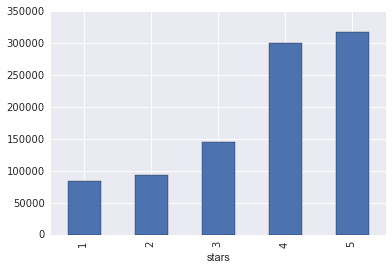

In [78]:
rest_reviews = pd.read_pickle('Yelp/rest_reviews2.pkl')
rest_reviews.groupby('stars').size().plot(kind = 'bar')

# Classification with Unigram

In [23]:
import re
import math
import random
import itertools

In [128]:
rest_reviews = pd.read_pickle('Yelp/rest_reviews2.pkl')
rest_reviews = rest_reviews.sample(n = 50000)

In [163]:
documents = [text for text in rest_reviews.filtered]
#documents = random.sample(documents, 30000)
all_words = list(itertools.chain(*documents))
all_words = [w for w in all_words if not any(c.isdigit() and re.match("^[a-z]?!", c) for c in w)]
            
freq_words = nltk.FreqDist(w.lower() for w in all_words)
freq_words = sorted(w for w in set(all_words) if freq_words[w] > 1000)
    
def document_features(document): # [_document-classify-extractor]
    document_words = set(document) # [_document-classify-set]
    features = {}
    for word in freq_words:
        features['contains({})'.format(word)] = (word.lower() in document_words)
    return features

In [164]:
features = pd.DataFrame([document_features(d) for d in documents])
features.head()

,contains(!),contains(1),contains(10),contains(12),contains(15),contains(2),contains(20),contains(3),contains(30),contains(4),...,contains(wrong),contains(year),contains(years),contains(yelp),contains(yes),contains(yet),contains(youll),contains(youre),contains(yum),contains(yummy)
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [166]:
features_dict = features.T.to_dict('dict')
featuresets = list(zip(list(features_dict.values()), rest_reviews.stars))

In [167]:
random.shuffle(featuresets)
train_set, test_set = featuresets[35000:], featuresets[:15000]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [168]:
print(nltk.classify.accuracy(classifier, test_set))

0.45666666666666667


In [169]:
from nltk.classify import decisiontree as tree
from sklearn.tree import DecisionTreeClassifier

classifier = nltk.classify.SklearnClassifier(DecisionTreeClassifier())
classifier.train(train_set)

print(nltk.classify.accuracy(classifier, test_set))

0.3748


In [170]:
from sklearn.svm import LinearSVC

classifier = nltk.classify.SklearnClassifier(LinearSVC())
classifier.train(train_set)

print(nltk.classify.accuracy(classifier, test_set))

0.5300666666666667


## Stemming 

In [171]:
from nltk.stem import PorterStemmer

rest_reviews['stemmed'] = ""
for index, row in rest_reviews.iterrows():
    stemmed_words = [PorterStemmer().stem(w) for w in row['filtered']]
    #stemmed_words = [nltk.stem.WordNetLemmatizer().lemmatize(w) for w in row['filtered']]
    rest_reviews.set_value(index, 'stemmed', stemmed_words)

In [172]:
rest_reviews = rest_reviews.sample(n = 50000)
rest_reviews.head()

,state,stars,filtered,stemmed
17820,IL,4,"[good, soup, fish, dishes]","[good, soup, fish, dish]"
424279,NV,3,"[talk, fried, chicken, bazic, curious, quite, ...","[talk, fri, chicken, bazic, curiou, quit, supp..."
576038,AZ,4,"[ventured, maricopa, visit, friends, found, li...","[ventur, maricopa, visit, friend, found, littl..."
276867,NV,3,"[saving, grace, crepes, meat, tough, rubbery, ...","[save, grace, crepe, meat, tough, rubberi, som..."
310977,AZ,4,"[1001, dinner, group, yelp, friends, thanks, j...","[1001, dinner, group, yelp, friend, thank, jim..."


In [220]:
documents = [text for text in rest_reviews.stemmed]
all_words = list(itertools.chain(*documents))
all_words = [w for w in all_words if not any(c.isdigit() for c in w)]

freq_words = nltk.FreqDist(w.lower() for w in all_words)
freq_words = sorted(w for w in set(all_words) if freq_words[w] > 900)

def document_features(document): # [_document-classify-extractor]
    document_words = set(document) # [_document-classify-set]
    features = {}
    for word in freq_words:
        features['contains({})'.format(word)] = (word.lower() in document_words)
    return features

In [221]:
features = pd.DataFrame([document_features(d) for d in documents])
features.head()

,contains(!),contains(?),contains(abl),contains(absolut),contains(across),contains(actual),contains(ad),contains(add),contains(addit),contains(ago),...,contains(write),contains(wrong),contains(ye),contains(year),contains(yelp),contains(yet),contains(youll),contains(your),contains(yum),contains(yummi)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [222]:
features_dict = features.T.to_dict('dict')
featuresets = list(zip(list(features_dict.values()), rest_reviews.stars))

In [223]:
random.shuffle(featuresets)
train_set, test_set = featuresets[35000:], featuresets[:15000]
classifier = nltk.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, test_set))

0.4487333333333333


In [224]:
from nltk.classify import decisiontree as tree
from sklearn.tree import DecisionTreeClassifier

classifier = nltk.classify.SklearnClassifier(DecisionTreeClassifier())
classifier.train(train_set)

print(nltk.classify.accuracy(classifier, test_set))

0.3801333333333333


In [225]:
from sklearn.svm import LinearSVC

classifier = nltk.classify.SklearnClassifier(LinearSVC())
classifier.train(train_set)

print(nltk.classify.accuracy(classifier, test_set))

0.529


# Adding Votes

In [18]:
data = []
with open('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json') as f:
    for line in f:
        data.append(json.loads(line))

data = data[:339264]

In [19]:
for d in data:
    for key, val in d['votes'].items():    # add each value in 'votes' as a column
        d[key] = val
    del d['votes']

In [20]:
reviews_v = []
for d in range(len(data)):
    gc.disable()
    reviews_v.append(pd.DataFrame(data[d], index=[0]))
    gc.enable()

In [21]:
df_v = pd.concat(reviews_v, axis = 0)           # Concatenate list of small dataframes into one big dataframe
df_v.to_csv('yelp_reviews_v.csv')

In [22]:
df_v = df_v.drop(df_v.columns[[2, 4, 7, 9]], axis=1)     # Remove unnecessary columns
df_v.head()

,business_id,cool,funny,stars,text,useful
0,vcNAWiLM4dR7D2nwwJ7nCA,1,0,5,dr. goldberg offers everything i look for in a...,2
0,vcNAWiLM4dR7D2nwwJ7nCA,0,0,2,"Unfortunately, the frustration of being Dr. Go...",2
0,vcNAWiLM4dR7D2nwwJ7nCA,1,0,4,Dr. Goldberg has been my doctor for years and ...,1
0,vcNAWiLM4dR7D2nwwJ7nCA,0,0,4,Been going to Dr. Goldberg for over 10 years. ...,0
0,vcNAWiLM4dR7D2nwwJ7nCA,1,0,4,Got a letter in the mail last week that said D...,2


In [23]:
pd.to_pickle(df_v, 'reviews_v_Red.pkl')
businesses = pd.read_pickle('Yelp/businesses.pkl')

rest_reviewsv = businesses.merge(df_v, how='left', on='business_id')
pd.to_pickle(rest_reviewsv, 'rest_reviewsv.pkl')
len(rest_reviewsv)

215850

In [24]:
rest_reviewsv.head()

,business_id,categories,review_count,state,cool,funny,stars,text,useful
0,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",11,PA,0,0,5,This place was DELICIOUS!! My parents saw a r...,5
1,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",11,PA,0,0,5,Can't miss stop for the best Fish Sandwich in ...,0
2,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",11,PA,1,0,5,This place should have a lot more reviews - bu...,2
3,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",11,PA,0,0,4,This place was very good. I found out about Em...,1
4,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",11,PA,0,0,5,"Old school.....traditional ""mom 'n pop"" qualit...",0


In [25]:
rest_reviewsv = rest_reviewsv.drop(rest_reviewsv.columns[[0, 1, 2, 3]], axis=1)
rest_reviewsv.head()

,cool,funny,stars,text,useful
0,0,0,5,This place was DELICIOUS!! My parents saw a r...,5
1,0,0,5,Can't miss stop for the best Fish Sandwich in ...,0
2,1,0,5,This place should have a lot more reviews - bu...,2
3,0,0,4,This place was very good. I found out about Em...,1
4,0,0,5,"Old school.....traditional ""mom 'n pop"" qualit...",0


In [26]:
remove_punctuation_map = dict((ord(char), None) for char in """#"$%&'()*+,-./:;<=>@[\]^_`{|}~""")
rest_reviewsv['tokens'] = rest_reviewsv['text'].apply(lambda x: str(x).translate(remove_punctuation_map).lower())
rest_reviewsv['tokens'] = rest_reviewsv['tokens'].apply(nltk.word_tokenize) 
rest_reviewsv = rest_reviewsv.drop(rest_reviewsv.columns[[3]], axis=1)

In [27]:
stops = set(stopwords.words('english'))
rest_reviewsv['filtered'] = ""
for index, row in rest_reviewsv.iterrows():
    filtered_words = [w for w in row['tokens'] if not w.lower() in stops]
    rest_reviewsv.set_value(index, 'filtered', filtered_words)
    
rest_reviewsv = rest_reviewsv.drop(rest_reviewsv.columns[[4]], axis=1)

In [7]:
pd.to_pickle(rest_reviewsv, 'rest_reviewsv2.pkl')
rest_reviewsv.head()

,cool,funny,stars,useful,filtered
0,0,0,5,5,"[place, delicious, !, !, parents, saw, recomme..."
1,0,0,5,0,"[cant, miss, stop, best, fish, sandwich, pitts..."
2,1,0,5,2,"[place, lot, reviews, im, glad, doesnt, dont, ..."
3,0,0,4,1,"[place, good, found, emils, watching, show, ca..."
4,0,0,5,0,"[old, schooltraditional, mom, n, pop, quality,..."


In [8]:
rest_reviewsv = pd.read_pickle('Yelp/rest_reviewsv2.pkl')
documents = [text for text in rest_reviewsv.filtered]
all_words = list(itertools.chain(*documents))
all_words = [w for w in all_words if not any(c.isdigit() and re.match("^[a-z]?!", c) for c in w)]
            
freq_words = nltk.FreqDist(w.lower() for w in all_words)
freq_words = sorted(w for w in set(all_words) if freq_words[w] > 1000)
    
def document_features(document): # [_document-classify-extractor]
    document_words = set(document) # [_document-classify-set]
    features = {}
    for word in freq_words:
        features['contains({})'.format(word)] = (word.lower() in document_words)
    return features

In [30]:
features = pd.DataFrame([document_features(d) for d in documents])
features.head()

,contains(!),contains(1),contains(10),contains(100),contains(11),contains(12),contains(13),contains(14),contains(15),contains(18),...,contains(yesterday),contains(yet),contains(york),contains(youd),contains(youll),contains(young),contains(youre),contains(youve),contains(yum),contains(yummy)
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [31]:
pd.to_pickle(features, 'features.pkl')

In [6]:
features = pd.read_pickle('Yelp/features.pkl')
work_table = pd.concat([rest_reviewsv[['funny','useful','cool']], features], axis=1)
work_table.head()

,funny,useful,cool,contains(!),contains(1),contains(10),contains(100),contains(11),contains(12),contains(13),...,contains(yesterday),contains(yet),contains(york),contains(youd),contains(youll),contains(young),contains(youre),contains(youve),contains(yum),contains(yummy)
0,0,5,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,1,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [9]:
len(documents)

215850

In [10]:
work_dict = work_table.T.to_dict('dict')
featuresets = list(zip(list(work_dict.values()), rest_reviewsv.stars))

In [36]:
random.shuffle(featuresets)
train_set, test_set = featuresets[70000:], featuresets[:15850]
#classifier = nltk.NaiveBayesClassifier.train(train_set)

#print(nltk.classify.accuracy(classifier, test_set))

In [68]:
df = pd.read_pickle('Downloads/preds.pkl')
df = df.drop('pred_final', axis=1)
df.head()

,pred_svm,pred_lr,pred_nb,pred_true
0,four,four,four,four
1,one,one,one,one
2,five,five,five,five
3,four,four,three,five
4,three,four,one,two


In [69]:
cols = [c for c in df.columns]
for i in cols:
    df[i] = [1 if star == 'one' else 2 if star == 'two' else 3 if star == 'three' 
                else 4 if star == 'four' else 5 if star == 'five' else 0 for star in df[i]]
    
df.head()

,pred_svm,pred_lr,pred_nb,pred_true
0,4,4,4,4
1,1,1,1,1
2,5,5,5,5
3,4,4,3,5
4,3,4,1,2


In [70]:
df['pred_final'] = np.around(df.mean(axis=1))
df.head()

,pred_svm,pred_lr,pred_nb,pred_true,pred_final
0,4,4,4,4,4
1,1,1,1,1,1
2,5,5,5,5,5
3,4,4,3,5,4
4,3,4,1,2,2


In [71]:
cols = [c for c in df.columns]
for i in cols:
    df[i] =  ["one" if star == 1 else "two" if star == 2 else "three" if star == 3 
                else "four" if star == 4 else "five" for star in df[i]]

df.head()

,pred_svm,pred_lr,pred_nb,pred_true,pred_final
0,four,four,four,four,four
1,one,one,one,one,one
2,five,five,five,five,five
3,four,four,three,five,four
4,three,four,one,two,two


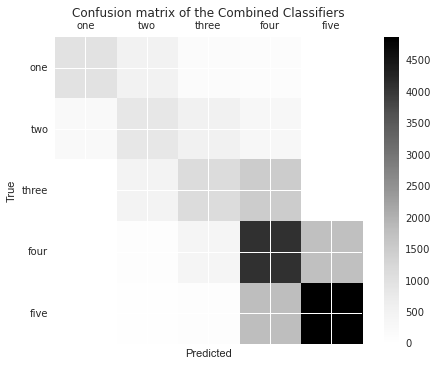

In [76]:
%matplotlib inline
from pylab import *
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix as confusion_matrix
from sklearn.metrics import classification_report as classification_report

labels = ['one', 'two', 'three', 'four', 'five']
cm = confusion_matrix(df['pred_true'], df['pred_final'], labels = labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Combined Classifiers')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [74]:
print (confusion_matrix(df['pred_true'], df['pred_final'], labels = labels))
print (classification_report(df['pred_true'], df['pred_final'], labels = labels))

[[ 962  532  153  104    0]
 [ 244  841  553  338    0]
 [   0  491 1140 1504    0]
 [   0   85  419 4096 1762]
 [   0   32   75 1793 4876]]
             precision    recall  f1-score   support

        one       0.80      0.55      0.65      1751
        two       0.42      0.43      0.43      1976
      three       0.49      0.36      0.42      3135
       four       0.52      0.64      0.58      6362
       five       0.73      0.72      0.73      6776

avg / total       0.60      0.60      0.59     20000

